In [97]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

In [82]:
plt.rcParams['savefig.facecolor'] = "0.8"

In [360]:
def plot_sig_(sig=None, **kwargs):
    """
    plot_sig_(
        X,
        eog = X_eog,
        eog_ch_names=[f"EOG [{i}]" for i in range(2)],
        fs=500,
        ch_names=[f"CH [{i}]" for i in range(10)],
        unit="microV",
        fname="test",
        markers=[{"t":0,"c":"black"},
                {"t":1,"c":"black"},
                {"t":2,"c":"red"}]
    );
    """
    
    # Getting specs    
    n, l = sig.shape
    
    dpi = kwargs.get("dpi")
    
    if dpi:
        fig = plt.figure(dpi=dpi)
    else:
        fig = plt.figure()
    
    eog_sig = kwargs.get("eog")
    n_eog, _ = eog_sig.shape
    
    # Get markers
    markers = kwargs.get("markers")
    
    n_ = n
    
    if n_eog:
        n_ = n + n_eog
        
    if markers:
        n_= n_ + 1
    
    gs = GridSpec(n_, 1)
            
    fs = kwargs.get("fs")
    ch_names = kwargs.get("ch_names")
    
    nsec = l/fs
    assert nsec >= 10, "Temporal scale is wrong!!!"
    taxis = np.linspace(0,nsec, l)
    
    _min, _max = np.min(sig),np.max(sig)
    _unit = kwargs.get("unit")
    
  
    
    # Plotting EEG signal
    for i in range(n):
        inner = GridSpecFromSubplotSpec(1,12, subplot_spec=gs[i])
        
        ## Component/Channel name
        ax0 = fig.add_subplot(inner[:,0])
        ax0.axis("off")
        ax0.text(1,.5,
                 ch_names[i],
                 verticalalignment="center",
                 horizontalalignment="right",)
        
        ## Signal
        ax1 = fig.add_subplot(inner[:,1:-1])
        ax1.plot(
            taxis,
            sig[i,:],
            linewidth=.5,
            color="black"
        )
        ax1.set(ylim=[_min, _max])
        ax1.set(xlim=(0, nsec))
        ax1.axis("off")
        
        if i == 0:
            # Save a copy for marking artefacts
            maker_ax = ax1
        
        ## Scale
        ax2 = fig.add_subplot(inner[:,-1])
        ax2.axis("off")
        
        if i == n-1:
            ax2.set(xlim=[-1,0], ylim=[0,1])
            ax2.plot([0,0],[0,1], color="black")
            ax2.plot([0,-10/nsec],[0,0], color="black")
            
            ax2.text(0.1,0.5,
                     f"{np.round(_max - _min, 2)} {_unit}",
                    verticalalignment="center",
                    horizontalalignment="left",)
            
            ax2.text(-10/nsec/2,-.1,
                     "1 sec",
                    verticalalignment="top",
                    horizontalalignment="center",)
    
    # Plotting EOG signal (if given)
    if n_eog:
        eog_ch_names = kwargs.get("eog_ch_names")
        eog_min, eog_max = np.min(eog_sig),np.max(eog_sig)
        
        for i in range(n, n_ - 1 if markers else n_):
            inner = GridSpecFromSubplotSpec(1,12, subplot_spec=gs[i])
        
            ## Component/Channel name
            ax0 = fig.add_subplot(inner[:,0])
            ax0.axis("off")
            ax0.text(1,.5,
                     eog_ch_names[i-n],
                     verticalalignment="center",
                     horizontalalignment="right",)

            ## Signal
            ax1 = fig.add_subplot(inner[:,1:-1])
            ax1.plot(
                taxis,
                eog_sig[i-n,:],
                linewidth=.5,
                color="black"
            )
            ax1.set(ylim=[eog_min, eog_max])
            ax1.set(xlim=(0, nsec))
            ax1.axis("off")


            ## Scale
            ax2 = fig.add_subplot(inner[:,-1])
            ax2.axis("off")

            if i == n + n_eog -1:
                ax2.set(xlim=[-1,0], ylim=[0,1])
                ax2.plot([0,0],[0,1], color="black")
                ax2.plot([0,-10/nsec],[0,0], color="black")

                ax2.text(0.1,0.5,
                         f"{np.round(eog_max - eog_min, 2)} {_unit}",
                        verticalalignment="center",
                        horizontalalignment="left",)

                ax2.text(-10/nsec/2,-.1,
                         "1 sec",
                        verticalalignment="top",
                        horizontalalignment="center",)
    fname = kwargs.get("fname")
    
    # Makers
    # [TODO]
    markers = kwargs.get("markers")
    
    if markers:
        inner = GridSpecFromSubplotSpec(1,12, subplot_spec=gs[-1])
        
        # Label 
        ax0 = fig.add_subplot(inner[:,0])
        ax0.axis("off")
        
        # Makers
        ax1 = fig.add_subplot(inner[:,1:-1])
        ax1.set(xlim=(0, nsec))
        ax1.axis("off")
        
        for m in markers:
            ax1.scatter(m["t"], 0, marker=6,c=m["c"])
        
    
    if fname:
        fig.savefig(f"{fname}.png")
        pass
    else:
        return fig

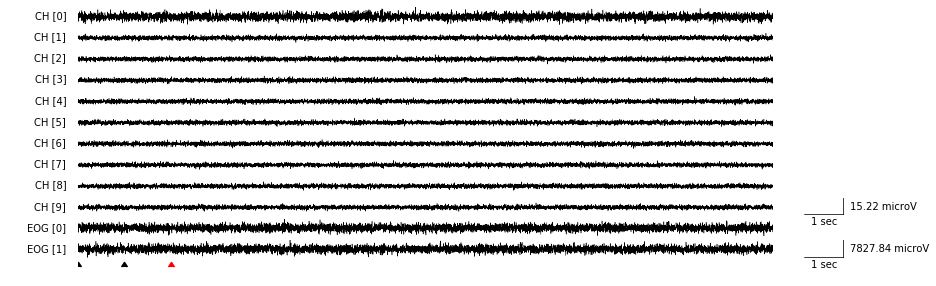

In [361]:
X = np.random.randn(10, 7500)
X[0,:] = 2*X[0,:]

X_eog = np.random.randn(2,7500)*1000
plt.rcParams["figure.figsize"] = [15,5]

plot_sig_(
    X,
    eog = X_eog,
    eog_ch_names=[f"EOG [{i}]" for i in range(2)],
    fs=500,
    ch_names=[f"CH [{i}]" for i in range(10)],
    unit="microV",
    fname="test",
    markers=[{"t":0,"c":"black"},
            {"t":1,"c":"black"},
            {"t":2,"c":"red"}]
);
plt.show()